# ANALYSE DES VENTES D'UNE LIBRAIRIE SOUS PYTHON
## CHARGEMENT ET NETTOYAGE DES DONNEES
### SOMMAIRE 
1. [ETAPE 1 : Chargement des jeux de données](#paragraph1)
    1. [Importer les éléments nécessaires au chargement et à l'analyse des données](#subparagraph1)
    2. [Prendre connaissance des jeux de données](#subparagraph2)    
2. [ETAPE 2 : Nettoyage des jeux de données](#paragraph2)
    1. [Nettoyage du fichier "products"](#subparagraph3)
    2. [Nettoyage du fichier "customers"](#subparagraph4)
    3. [Nettoyage du fichier "transactions"](#subparagraph5)

## ETAPE 1 : Chargement des jeux de données <a name="paragraph1"></a>

 *Dans cette première étape, nous allons importer les différents jeux de données qui nous ont été envoyés par Antoine et mener quelques vérifications sur celles-ci avant de procéder au nettoyage*
 
 ### A. Importer les éléments nécessaires au chargement et à l'analyse des données <a name="subparagraph1"></a>
 
#### Dans un premier temps, nous Importons les librairies dont nous avons besoin à savoir : pandas, numpy, matplotlib, seaborn, re, os, platform.

In [51]:
# Importation des librairies
import importlib.metadata
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import platform
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

    Descriptif des principales librairies utilisées :
* <span style="color:magenta">pandas</span> est utilisé pour manipuler des données statistiques,
* <span style="color:magenta">numpy</span> est utilisé pour les calculs scientifiques,
* <span style="color:magenta">seaborn</span> est utilisé pour la visualisation de données et de graphiques statistiques,
* <span style="color:magenta">matplotlib</span> est également utilisé pour la visualisation de données et de graphiques statistiques,
* <span style="color:magenta">os</span> est utilisé pour fournir une façon portable d'utiliser les fonctionnalités dépendantes du système d'exploitation,
* <span style="color:magenta">platform</span> est utilisé pour interroger l'exécutable le système d'exploitation pour diverses informations sur l'architecture,
* <span style="color:magenta">re</span> est utilisé pour le traitement de caractères.

#### Dans un second temps, nous renseigons les versions des librairies et du système d'exploitation utilisés.

In [2]:
# Version de python et des librairies utilisées
!python --version

print("version de numpy : ",np.__version__)
print("version de re : ",re.__version__)
print("version de seaborn : ",sns.__version__)
print("Version de matplotlib : ",importlib.metadata.version('matplotlib'))
print("Version de plotly : ",importlib.metadata.version('plotly'))

print("nom de l'OS : ",os.name)
print("nom de la plateforme : ",platform.system())
print("version : ",platform.release())

Python 3.9.12
version de numpy :  1.21.5
version de re :  2.2.1
version de seaborn :  0.11.2
Version de matplotlib :  3.5.1
Version de plotly :  5.6.0
nom de l'OS :  nt
nom de la plateforme :  Windows
version :  10


 ### B. Prendre connaissance des jeux de données <a name="subparagraph2"></a>
Nous commencons par  lister les jeux de données sur lesquels nous allons devoir travailler.

In [3]:
# Liste des jeux de données
print(os.listdir(r'C:\Users\Axel BENOIT\FORMATION\Analyse des ventes'))

['.ipynb_checkpoints', 'ANALYSE (1).ipynb', 'Chargement et nettoyage des donnees.ipynb', 'customers.csv', 'Data.csv', 'formation présentation.pptx', 'Graph', 'products.csv', 'transactions.csv']


Nous détenons l'information qu'il existe trois jeux de données.Nous allons ouvrir ces fichiers pour obtenir un premier aperçu des informations présentes dans chacun d'entre-eux.
#### FICHIER "TRANSACTIONS"

In [4]:
# Lecture des fichiers csv
df_transactions = pd.read_csv('transactions.csv')

# Informations sur la base de données
df_transactions.info()

# Visualisation des données sous forme de tableau
display(df_transactions.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


#### FICHIER "PRODUCTS"

In [5]:
# On réitère le même processus sur le fichier product
df_products = pd.read_csv('products.csv')
df_products.info()
display(df_products.head((5)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


#### FICHIER "CUSTOMERS"

In [6]:
# On réitère le même processus sur le fichier customers
df_customers = pd.read_csv('customers.csv')
df_customers.info()
display(df_customers.head((5)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


### Observations générales :

L'execution de ce bloc de code nous permet d'afficher la structure d'un DataFrame et ses premières lignes. Nous connaissons à présent le nombre de lignes, de colonnes, leur type et s'il existe des valeurs manquantes.

- A priori, il n'existe pas de valeurs manquantes dans les trois fichiers que nous avons lu.
- A l'inverse du premier, les fichiers "customers.csv" et "products.csv" continnent des données au format texte (object) et numérique entier (int64). Plus spécifiquement, le dernier fichier contient des données au format texte et au format numérique entier et décimal.
- La lecture des fichiers nous permet déjà d'envisager la qualification d'un profil client et de quelques agrégats économiques. En regardant de plus près, nous voyons la possibilité de réaliser une jointure des fichiers "customers.csv" et "products.csv" sur la base du fichier "transaction.csv" et des variables 'id_prod'et 'client_id' pour regrouper les données.

Avant toute chose, il est nécessaire de nettoyer les données.

## ETAPE 2 : Nettoyage des jeux de données <a name="paragraph2"></a>

Nous allons nettoyer l'ensemble des fichiers avant de pouvoir les compiler et établir une jointure entre les jeux de données.
Pour cela, nous allons inspecter les fichiers à la recherche de valeurs manquantes, de doublons, de valeurs extrêmes ou abérrantes pour chacun des fichiers.

### A. Nettoyage du fichier "products" <a name="subparagraph3"></a>

Nous pouvons directement commencer par inspecter s'il existe des doublons. Nous n'avons pas besoin de vérifier les valeurs manquantes par la fonction ".isnull()", car cette information est déjà renseignée par la fonction ".info()"

In [7]:
# Fonction pour définir le nombre de doublons
def doublons(df_products): 
    print(len(df_products) - len(df_products.drop_duplicates()), 'doublons')

doublons(df_products)

0 doublons


In [8]:
# Fonction pour vérification de la clé primaire
def cle_primaire (df_products): 
  table_length = len(df_products) - len(df_products.drop_duplicates())
  if table_length == 0:
    print('Clé primaire (0 doublon)')
  else:
    print('Pas une clé primaire (', table_length, 'doublons )')
    
cle_primaire(df_products['id_prod'])

Clé primaire (0 doublon)


In [9]:
# recherche d'informations sur le fichier et la catégorie des prix
# La valeur (-1) apparait abérrante.
display(df_products.describe(include='all'))

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [10]:
# recherche de la valeur abérrante (-1)
print(np.where(df_products['price']<0))
print(df_products.iloc[731,0])

(array([731], dtype=int64),)
T_0


In [11]:
# suppression de la valeur abérrante (-1)
df_products.drop(731,0,inplace=True)

C:\Users\Axel BENOIT\AppData\Local\Temp\ipykernel_20832\1512528506.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_products.drop(731,0,inplace=True)


### Observations :
- Le fichier ne contient pas de valeurs manquantes.
- Le fichier ne contient pas de doublons.
- Le fichier semble contenir une valeur abérrante. Lorsque l'on étudie la catégorie price, on observe un prix négatif (min -1). Nous avonc donc repéré et choisi de supprimer la ligne de ce produit.

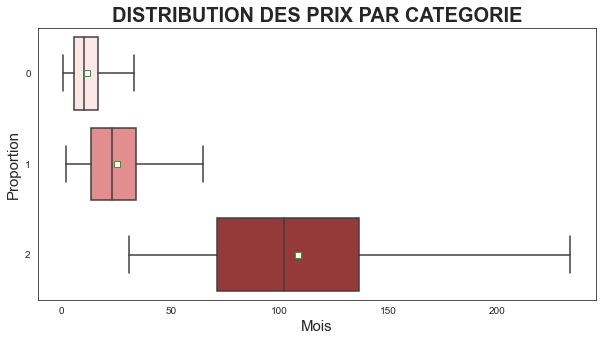

In [101]:
# observation de la distribution des prix

plt.figure(figsize=(10,5))

# Génération du graphique
sns.boxplot(data=df_products, y='categ', x='price', orient='h', showfliers=False, showmeans=True, palette=["mistyrose","lightcoral",'brown'], meanprops={"marker":"s","markerfacecolor":"white"})

# titre du graphique
plt.title("DISTRIBUTION DES PRIX PAR CATEGORIE",weight='bold', size=20)

# titre des axes et paramètres
plt.xlabel("Mois", fontsize=15)
plt.ylabel("Proportion", fontsize=15)
plt.show()


In [13]:
print('Catégorie 0 :',
    '\n- Prix moyen :', round(df_products[df_products['categ']==0]['price'].mean(), 2),
    '\n- Prix médian :', df_products[df_products['categ']==0]['price'].median(), 
    '\n- Mode :', df_products[df_products['categ']==0]['price'].mode().values[0]) 

print('Catégorie 1 :',
    '\n- Prix moyen :', round(df_products[df_products['categ']==1]['price'].mean(), 2),
    '\n- Prix médian :', df_products[df_products['categ']==1]['price'].median(), 
    '\n- Mode :', df_products[df_products['categ']==1]['price'].mode().values[0]) 

print('Catégorie 2 :',
    '\n- Prix moyen :', round(df_products[df_products['categ']==2]['price'].mean(), 2),
    '\n- Prix médian :', df_products[df_products['categ']==2]['price'].median(), 
    '\n- Mode :', df_products[df_products['categ']==2]['price'].mode().values[0]) 

Catégorie 0 : 
- Prix moyen : 11.73 
- Prix médian : 10.32 
- Mode : 4.99
Catégorie 1 : 
- Prix moyen : 25.53 
- Prix médian : 22.99 
- Mode : 22.99
Catégorie 2 : 
- Prix moyen : 108.35 
- Prix médian : 101.99 
- Mode : 50.99


### Observations :
- Dans la distribution des prix, nous observons quelques valeurs élevées. Nous décidons de les garder car celles-ci peuvent se jusitifier. Il peut par exemple s'agir d'une collection entière d'un produit, ce qui pourrait expliquer les prix observés. Sans informations supplémentaires, il est préférable de les garder.
- On notera également la variation de l'intervalle des prix en fonction des catégories. Pour aller plus loin, nous renseignons pour chaque catégorie, le prix moyen, le prix médian et le mode.

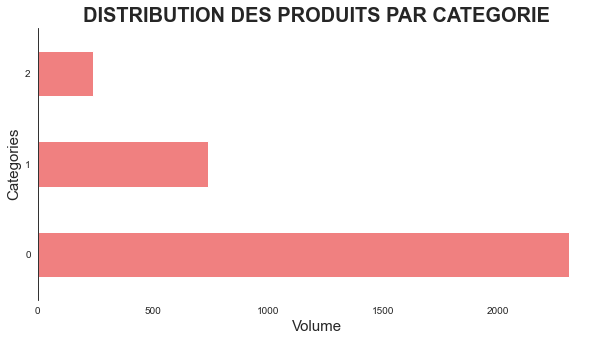

In [102]:
# Information sur les catégories
categ = df_products['categ'].value_counts()
id_prod = df_products['id_prod'].value_counts()

fig = plt.figure(figsize = (10, 5))

# suppression de l'arrière plan
fig.patch.set_visible(False)
ax = plt.axes()
ax.patch.set_visible(False)

# supression du cadre
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_visible(False)

# titre du graphique
plt.title("DISTRIBUTION DES PRODUITS PAR CATEGORIE",weight='bold', size=20)

# titre des axes
plt.xlabel('Volume', fontsize=15)
plt.ylabel('Categories', fontsize=15)

# paramètre des axes
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Génération du graphique
categ.plot.barh(color='lightcoral')
plt.grid(False)
plt.show()

### Observations :
- La catégorie la plus représentée est la catégorie 0, suivi de la 1, puis de la 2.
- Nous ne connaissons par la définition des catégories, mais celles-ci semblent correspondrent à des produits d'une gamme particulière. Le numéro de catégorie est constitutif de la variable l'id_prod.


Nous avons remarqué qu'une seule erreur, celle d'une valeur abérante (-1). Après avoir réalisé sa suppression le fichier semble propre.

L'id "T_0" retient notre attention car celui-ci ne semble par constituer de la même manière que les autres. Il ne commence pas par un chiffre appartenant à une catégorie (0,1,2), mais par une lettre (t).*


### B. Nettoyage du fichier "customers" <a name="subparagraph4"></a>

In [15]:
# Nous réutilisons la fonction pour vérifier s'il y a des doublons
doublons(df_products)

0 doublons


In [16]:
# Nous réutilisons la fonction pour vérifier la clé primaire du fichier
cle_primaire(df_products)

Clé primaire (0 doublon)


In [17]:
# recherche d'informations sur le fichier.
display(df_customers.describe(include='all'))

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [18]:
# recherche des modalités pour la variable sex
print('Modalités de \'sex\' :', list(df_customers['sex'].unique()))

Modalités de 'sex' : ['f', 'm']


### Observations :
- Le fichier ne contient pas de valeurs manquantes.
- Le fichier ne contient pas de doublons.
- Le fichier ne semble pas contenir de valeurs abérrantes d'après les principales informations statistiques et la distribution graphique.
- 2 modalités constituent la variable sex, à savoir : f (féminin) et m (masculin).

<AxesSubplot:>

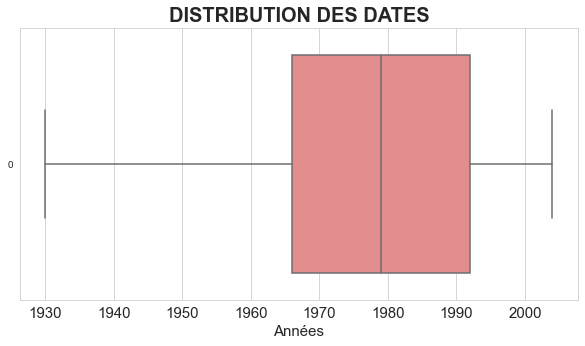

In [82]:
# observation de la distribution des dates
plt.figure(figsize = (10, 5))
sns.set_style(style='whitegrid')
display(sns.boxplot(data=df_customers['birth'], orient='h', color='lightcoral'))
plt.title('DISTRIBUTION DES DATES', weight='bold',size=20)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel("Années", fontsize=15)
plt.show()


In [56]:
# recherche du nombre de dates diférentes pour optimiser la distribution graphique des dates;
birth= df_customers['birth']
print(len(set(birth)))

75


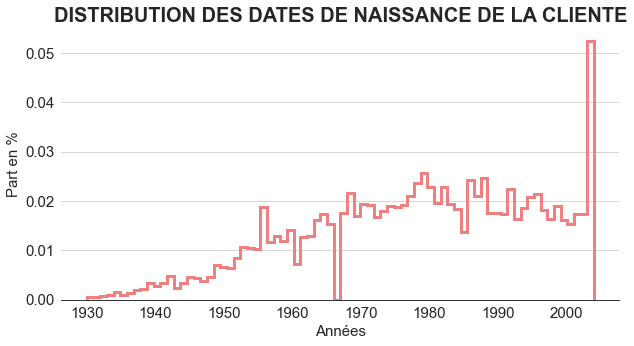

In [97]:
birth= df_customers['birth']
fig = plt.figure(figsize = (10, 5))

# suppression de l'arrière plan
fig.patch.set_visible(False)
ax = plt.axes()
ax.patch.set_visible(False)

sns.set_style(style='white')

# supression du cadre
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('black')

# titre du graphique
plt.title("DISTRIBUTION DES DATES DE NAISSANCE DE LA CLIENTE",weight='bold', size=20)

# Parametre des axes
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
  
# titre des axes
birth.plot.hist(bins=76, density=True, histtype = 'step', orientation = 'vertical', linewidth=3, color='lightcoral')
plt.xlabel("Années", fontsize=15)
plt.ylabel("Part en %", fontsize=15)
ax.yaxis.grid(True)
plt.show()

### Observations :
- La distribution des dates de naissance de la clientèle montre une majorité de clients agés de moins de 25 ans.
- Les années de naissance s'étalent de 1929 à 2004.
- Aucune valeur ne semble incohérente.


In [22]:
# Définition de la plage et de la période des dates de naissance pour un regroupement de données
period_length = 5
start_year = 1930
end_year = 2004
df_customers = df_customers[(df_customers['birth'] >= 1930) & (df_customers['birth'] <= 2004)]
year_range = end_year - start_year
modulo = year_range % period_length

# Nous délimitons le début et la fin
if modulo == 0:
    final_start = end_year - period_length
else:
    final_start = end_year - modulo

final_end = end_year + 1
starts = np.arange(start_year, final_start, period_length).tolist()

tuples = [(start, start+period_length) for start in starts]
tuples.append(tuple([final_start, final_end]))
bins = pd.IntervalIndex.from_tuples(tuples, closed='left')

original_labels = list(bins.astype(str))
new_labels = ['{} - {}'.format(b.strip('[)').split(', ')[0], int(b.strip('[)').split(', ')[1])-1) for b in original_labels]
label_dict = dict(zip(original_labels, new_labels))

df_customers['PERIOD'] = pd.cut(df_customers['birth'], bins=bins, include_lowest=True, precision=0)
df_customers['PERIOD'] = df_customers['PERIOD'].astype("str")
df_customers = df_customers.replace(label_dict)

display(df_customers.head())

,client_id,sex,birth,PERIOD
0,c_4410,f,1967,1965 - 1969
1,c_7839,f,1975,1975 - 1979
2,c_1699,f,1984,1980 - 1984
3,c_5961,f,1962,1960 - 1964
4,c_5320,m,1943,1940 - 1944


In [23]:
# Définition du nombre de périodes pour la réalisation graphique
PERIOD = df_customers['PERIOD']
print(len(set(PERIOD)))

15


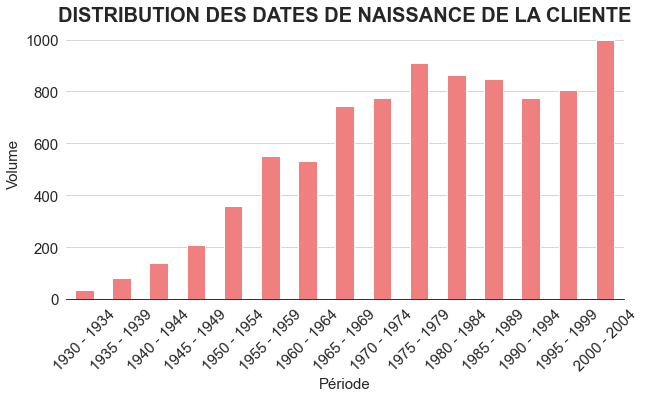

In [88]:
# dimension du graphique
fig = plt.figure(figsize = (10, 5))

# suppression de l'arrière plan
fig.patch.set_visible(False)
ax = plt.axes()
ax.patch.set_visible(False)

# supression du cadre
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('black')

# titre du graphique
plt.title("DISTRIBUTION DES DATES DE NAISSANCE DE LA CLIENTE",weight='bold', size=20)

# Parametre des axes
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

ordered_bins = []
for i in range(1930, 2004, 5):
    ordered_bins.append(str(i) + ' - ' + str(i+4))

period = df_customers['PERIOD'].value_counts().reindex(ordered_bins)

# titre des axes
period.plot.bar(color='lightcoral')
ax.yaxis.grid(True)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.xlabel("Période", fontsize=15)
plt.ylabel("Volume", fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [2]:
# Vérification de la forme des identifiants
for index, row in df_customers.iterrows():
    if not bool(re.match(r"c_[0-9]+", row['client_id'])):
        print(index, row['client_id'])

NameError: name 'df_customers' is not defined

### Observations :
- Le fichier ne contient pas de valeurs manquantes.
- Le fichier ne contient pas de doublons sur la clé primaire 'id_client'.
- Le fichier ne semble pas contenir de valeurs abérrantes sur les dates de naissance des clients.
- La vérification de la forme des identifiants nous informe qu'il existe deux identifiants qui ont une forme différente, à savoir : 'ct_0' et 'ct_1'. Nous ne pocédons à aucune manipulation, mais nous gardons en tête la question de leur signification  pour une vérification à posteriori.

Nous allons à présent, nettoyer le dernier fichier.

### C. Nettoyage du fichier "transactions" <a name="subparagraph5"></a>

In [26]:
# Détection des doublons
# La fonction ne renvoit à aucun doublon.S'agissant d'une base de données enregistraant les sessions 
doublons(df_products)

0 doublons


In [27]:
# Vérification des clés primaires
cle_primaire(df_transactions[['client_id', 'id_prod', 'date']]) 

Pas une clé primaire ( 126 doublons )


In [28]:
# Affichage des doublons
print(df_transactions.duplicated().sum(),"doublons détectés")

# Suppression des doublons
df_transactions.drop_duplicates(inplace=True)

# Vérification du nombre de lignes
print(len(df_transactions), 'lignes après suppression des doublons')

126 doublons détectés
679406 lignes après suppression des doublons


In [29]:
# recherche d'informations sur le fichier.
display(df_transactions.describe(include='all'))
# le fichier contient une variable quantitative, la date

,id_prod,date,session_id,client_id
count,679406,679406,679406,679406
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237449,s_0,c_1609
freq,2252,2,74,25488


In [30]:
# Comparaison d'une clé unique entre 2 dataframes
def compare_keys(variable, df1, df1_name, df2, df2_name):
    df1_keys = pd.DataFrame(df1[variable].unique()) # Projection de df1 sur la variable
    df2_keys = pd.DataFrame(df2[variable].unique()) # Projection de df2 sur la variable
       
    keys_1 = df1_keys.merge( # Clés de df2 non présentes dans df1
        df2_keys, how='outer', indicator=True).loc[lambda x : x['_merge']=='right_only']  
    print('Clés de', df2_name, 'non présentes dans', df1_name + ' : ', len(keys_1))   
    
    keys_2 = df2_keys.merge(  # Clés de df1 non présentes dans df2
    df1_keys, how='outer', indicator=True).loc[lambda x : x['_merge']=='right_only']
    print('Clés de', df1_name, 'non présentes dans', df2_name + ' : ', len(keys_2))
    
# Comparaison de 'client_id' entre transactions et clients
compare_keys('client_id', df_customers, 'clients', df_transactions, 'transactions') 
print('- ' * 24)

# Comparaison de la clé 'id_prod' entre transactions et produits
compare_keys('id_prod', df_products, 'produits', df_transactions, 'transactions') 

Clés de transactions non présentes dans clients :  3
Clés de clients non présentes dans transactions :  21
- - - - - - - - - - - - - - - - - - - - - - - - 
Clés de transactions non présentes dans produits :  2
Clés de produits non présentes dans transactions :  21


In [31]:
# Clé de 'id_prod' uniquement présente dans transactions
display(df_transactions.drop(df_transactions[df_transactions['id_prod'].isin(df_products['id_prod'])].index))

,id_prod,date,session_id,client_id
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10106,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713
...,...,...,...,...
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
670682,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167
671286,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453
675679,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098


In [32]:
# Clé de 'id_clients' uniquement présente dans transactions
display(df_transactions.drop(df_transactions[df_transactions['client_id'].isin(df_customers['client_id'])].index))

,id_prod,date,session_id,client_id
5925,0_1410,2022-07-10 02:20:40.037784,s_236166,c_577
8065,1_520,2022-11-26 08:49:31.629569,s_303000,c_5302
8790,1_381,2022-06-10 02:39:48.061727,s_221428,c_577
11025,1_735,2022-08-26 07:33:10.033618,s_258622,c_577
13082,1_527,2021-05-07 04:37:07.771808,s_30988,c_8362
...,...,...,...,...
661282,1_708,2023-01-08 03:41:25.574167,s_323631,c_577
670167,0_1626,2021-05-02 00:50:26.576072,s_28633,c_577
671578,0_2096,2021-11-26 07:22:43.209868,s_125219,c_577
672139,1_521,2022-07-11 04:57:20.717721,s_236737,c_5302


### Observations :
- Le fichier ne contient pas de valeurs manquantes.
- Le fichier contenait 126 doublons.
- Les variables *'client_id*  et *'id_prod'* du fichier transactions sont des clés étrangères vers les fichiers customers et products.
- On notera que pour les clés du fichier transactions, il y a moins de valeurs uniques que dans les autres jeux de données :21 clients enregistrés n'ont pas passé commande, et 21 produits n'ont pas été vendus.
- Pour le fichier transactions, il existe 2 produits présents uniquement dans celui-ci : 0_2245 et T_0 pour un total de 295 occurrences. De plus, il existe 3 clients présents uniquement dans le fichier transactions : c_577, c_5302, c_8362 pour un total de 201 occurrences.
- Le fichier ne semble pas contenir de valeurs aberrantes, mais il va nous falloir modifier le format des dates pour les exploiter. A priori, la fonction .describe() montre qu'il existe plus de dates que de sessions uniques. Il se pourrait qu'une même session puisse contenir plusieurs dates de transactions.

In [33]:
# recherche de l'identifiant 'T_0' mentionné ci-dessus
display(df_transactions.loc[df_transactions['id_prod'] == "T_0"])

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
577324,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_0
593065,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_1
607892,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_0
626049,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_0


In [34]:
# supressions des lignes relatives à 'T_0'
df_transactions = df_transactions[df_transactions['id_prod'] != "T_0"]

In [35]:
# vérification s'il existe encore des lignes de test 'T_0'
print(np.where(df_transactions['id_prod'] == "T_0"))

(array([], dtype=int64),)


In [36]:
# Modification de la date
# On garde la date originale au cas où l'on est besoin d'étudier les périodes d'achat
df_transactions['date'].str.split('.')
df_transactions[['Date','Date2']] = df_transactions['date'].str.split('.', expand=True) 
df_transactions[['years_month_day','Hour']] = df_transactions['date'].str.split(" ", expand=True) 
df_transactions[['Year','Month', 'Day']] = df_transactions['years_month_day'].str.split('-', expand=True)
df_transactions.drop(columns = ['date','Date2', 'Hour', 'Month', 'Day'], inplace = True)

display(df_transactions.head(5))

,id_prod,session_id,client_id,Date,years_month_day,Year
0,0_1518,s_211425,c_103,2022-05-20 13:21:29,2022-05-20,2022
1,1_251,s_158752,c_8534,2022-02-02 07:55:19,2022-02-02,2022
2,0_1277,s_225667,c_6714,2022-06-18 15:44:33,2022-06-18,2022
3,2_209,s_52962,c_6941,2021-06-24 04:19:29,2021-06-24,2021
4,0_1509,s_325227,c_4232,2023-01-11 08:22:08,2023-01-11,2023


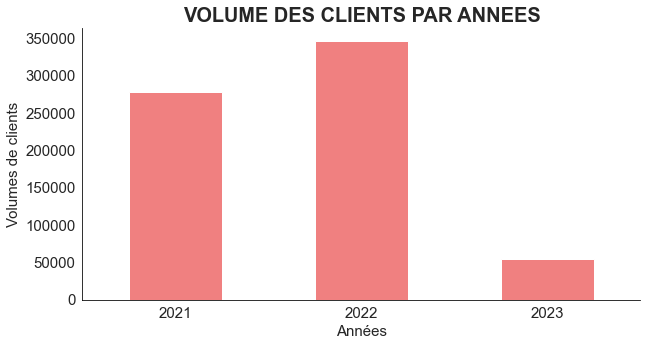

In [96]:
# Information sur les catégories
Year = df_transactions['Year'].value_counts().reindex(['2021', '2022', '2023'])

fig = plt.figure(figsize = (10, 5))

# suppression de l'arrière plan
fig.patch.set_visible(False)
ax = plt.axes()
ax.patch.set_visible(False)

# supression du cadre
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

# titre du graphique
plt.title("VOLUME DES CLIENTS PAR ANNEES",weight='bold', size=20)
 
# titre des axes
plt.xlabel("Années", fontsize=15)
plt.ylabel("Volumes de clients", fontsize=15)

# Parametre des axes
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

# Création du graphique
Year.plot.bar(color='lightcoral')
plt.xticks(rotation='horizontal')
plt.show()

In [38]:
# création d'un DF représentant lle volume de clients par an
df_transactions ['month_year'] = pd.to_datetime(df_transactions['Date']).dt.to_period('M')
display(df_transactions.head())
by_month = pd.to_datetime(df_transactions['Date']).dt.to_period('M').value_counts().sort_index()
by_month.index = pd.PeriodIndex(by_month.index)
df_month = by_month.rename_axis('Month').reset_index(name='counts_id')

display(df_month.head())

,id_prod,session_id,client_id,Date,years_month_day,Year,month_year
0,0_1518,s_211425,c_103,2022-05-20 13:21:29,2022-05-20,2022,2022-05
1,1_251,s_158752,c_8534,2022-02-02 07:55:19,2022-02-02,2022,2022-02
2,0_1277,s_225667,c_6714,2022-06-18 15:44:33,2022-06-18,2022,2022-06
3,2_209,s_52962,c_6941,2021-06-24 04:19:29,2021-06-24,2021,2021-06
4,0_1509,s_325227,c_4232,2023-01-11 08:22:08,2023-01-11,2023,2023-01


,Month,counts_id
0,2021-03,28610
1,2021-04,28457
2,2021-05,28293
3,2021-06,26857
4,2021-07,24742


In [106]:
# Représentation des volumes de clients
fig = go.Figure(data=go.Scatter(x=df_month['Month'].astype(dtype=str), y=df_month['counts_id'], marker_color='lightcoral', text="counts_id"))
fig.update_layout({"title": "VOLUME DE CLIENTS MENSUELS",
                   "xaxis": {"title":"Mois"},
                   "yaxis": {"title":"Volume de clients"},
                   "showlegend": False})
fig.show()

In [40]:
# Sélection de l'année 2022 comme référentiel de notre analyse
df_transactions_2022 = df_transactions[df_transactions['Year']  == "2022"]
display(df_transactions_2022.head())

,id_prod,session_id,client_id,Date,years_month_day,Year,month_year
0,0_1518,s_211425,c_103,2022-05-20 13:21:29,2022-05-20,2022,2022-05
1,1_251,s_158752,c_8534,2022-02-02 07:55:19,2022-02-02,2022,2022-02
2,0_1277,s_225667,c_6714,2022-06-18 15:44:33,2022-06-18,2022,2022-06
5,0_1418,s_285425,c_1478,2022-10-20 15:59:16,2022-10-20,2022,2022-10
6,0_1475,s_218033,c_7782,2022-06-03 04:45:09,2022-06-03,2022,2022-06


### Observations :
- La date est présente dans deux formats de données au sein d'une colonne. Nous décidons de modifier la date pour pouvoir l'exploiter. Nous gardons une date au format le plus précis, puis nous la ventilons pour obtenir des colonnes renseignant l'année ou le jour pour de futures analyses. 
- Nous sélectionnons uniquement l'année 2022 pour l'analyse, car elle semble la plus représentative par rapport aux autres, et cela, pour plusieurs raisons : il s'agit de la seule année entière d'exercice et les données semblent cohérentes (absence d'informations fausses ou contradictoires). Nous aurons donc des informations plus complètes pour l'analyse du profil client, mais également un référentiel pour réitérer ladite analyse.

Il ne nous reste plus qu'à créer la jointure entre les différents fichiers.

In [41]:
# Fusion des fichiers en un seul fichier unique pour le traitement
df_merged= df_transactions_2022.merge(df_customers, how='left', on='client_id').merge(df_products, how='left', on='id_prod')

display(df_merged)

,id_prod,session_id,client_id,Date,years_month_day,Year,month_year,sex,birth,PERIOD,price,categ
0,0_1518,s_211425,c_103,2022-05-20 13:21:29,2022-05-20,2022,2022-05,f,1986.0,1985 - 1989,4.18,0.0
1,1_251,s_158752,c_8534,2022-02-02 07:55:19,2022-02-02,2022,2022-02,m,1988.0,1985 - 1989,15.99,1.0
2,0_1277,s_225667,c_6714,2022-06-18 15:44:33,2022-06-18,2022,2022-06,f,1968.0,1965 - 1969,7.99,0.0
3,0_1418,s_285425,c_1478,2022-10-20 15:59:16,2022-10-20,2022,2022-10,f,1972.0,1970 - 1974,8.57,0.0
4,0_1475,s_218033,c_7782,2022-06-03 04:45:09,2022-06-03,2022,2022-06,m,1981.0,1980 - 1984,11.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
346495,1_425,s_181088,c_5533,2022-03-18 21:34:28,2022-03-18,2022,2022-03,f,1965.0,1965 - 1969,16.99,1.0
346496,0_1551,s_150195,c_8489,2022-01-15 13:05:06,2022-01-15,2022,2022-01,f,1951.0,1950 - 1954,12.99,0.0
346497,1_639,s_181434,c_4370,2022-03-19 16:03:23,2022-03-19,2022,2022-03,f,1977.0,1975 - 1979,10.99,1.0
346498,0_1425,s_314704,c_304,2022-12-20 04:33:37,2022-12-20,2022,2022-12,f,1988.0,1985 - 1989,12.99,0.0


In [42]:
# Détection des valeurs manquantes
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346500 entries, 0 to 346499
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype    
---  ------           --------------   -----    
 0   id_prod          346500 non-null  object   
 1   session_id       346500 non-null  object   
 2   client_id        346500 non-null  object   
 3   Date             346500 non-null  object   
 4   years_month_day  346500 non-null  object   
 5   Year             346500 non-null  object   
 6   month_year       346500 non-null  period[M]
 7   sex              346385 non-null  object   
 8   birth            346385 non-null  float64  
 9   PERIOD           346385 non-null  object   
 10  price            346380 non-null  float64  
 11  categ            346380 non-null  float64  
dtypes: float64(3), object(8), period[M](1)
memory usage: 34.4+ MB


Après la jointure, nous observons  certaines colonnes avec des valeurs manquantes. Il doit s'agir des données détectées lors de la comparaison des clés des différents dataframe. Nous allons donc vérifier cela et procéder à une des possibilités suivantes :
- Supprimer les lignes concernées;
- Déterminer une valeur fixe;
- Modéliser cette valeur.

In [43]:
# Vérification des données manquantes après jointure
display(df_merged[(df_merged['sex'].isnull()) & (df_merged['birth'].isnull()) & (df_merged['PERIOD'].isnull())])

,id_prod,session_id,client_id,Date,years_month_day,Year,month_year,sex,birth,PERIOD,price,categ
2981,0_1410,s_236166,c_577,2022-07-10 02:20:40,2022-07-10,2022,2022-07,NaN,NaN,NaN,14.85,0.0
4051,1_520,s_303000,c_5302,2022-11-26 08:49:31,2022-11-26,2022,2022-11,NaN,NaN,NaN,13.35,1.0
4410,1_381,s_221428,c_577,2022-06-10 02:39:48,2022-06-10,2022,2022-06,NaN,NaN,NaN,15.99,1.0
5572,1_735,s_258622,c_577,2022-08-26 07:33:10,2022-08-26,2022,2022-08,NaN,NaN,NaN,22.99,1.0
8153,0_1449,s_291654,c_577,2022-11-02 13:34:50,2022-11-02,2022,2022-11,NaN,NaN,NaN,4.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
323686,1_245,s_143905,c_8362,2022-01-02 14:30:08,2022-01-02,2022,2022-01,NaN,NaN,NaN,23.99,1.0
325867,1_28,s_182284,c_577,2022-03-21 11:56:10,2022-03-21,2022,2022-03,NaN,NaN,NaN,13.03,1.0
329208,1_580,s_232481,c_5302,2022-07-02 12:50:50,2022-07-02,2022,2022-07,NaN,NaN,NaN,21.09,1.0
333324,0_1503,s_306083,c_8362,2022-12-02 14:27:57,2022-12-02,2022,2022-12,NaN,NaN,NaN,15.99,0.0


In [50]:
# Volume des données concernées dans le DF
def fun_temp(input_str):
    print('Le client ' + input_str + ' représente environ :',
          round((len(df_merged[df_merged['client_id'] == input_str]) / len(df_merged) * 100), 4),
          '% du dataset')

fun_temp('c_577')
fun_temp('c_5302')
fun_temp('c_8362')

del fun_temp

Le client c_577 représente environ : 0.0193 % du dataset
Le client c_5302 représente environ : 0.0058 % du dataset
Le client c_8362 représente environ : 0.0081 % du dataset


### Observations :
Pour ces trois clients, nous ne disposons pas de leur date de naissance, ni de leur genre. Ils ne représentent que peu de données. Nous décidons de les garder pour utiliser certaines données correspondantes à ces lignes (price), mais nous les supprimerons lorsque nous analyserons le profil client des acheteurs. Nous n'avons pas la possibilité de déterminer une valeur fixe ou de modéliser cette valeur.

In [45]:
# Vérification des données manquantes après jointure
df_merged[(df_merged['price'].isnull()) & (df_merged['categ'].isnull())]

,id_prod,session_id,client_id,Date,years_month_day,Year,month_year,sex,birth,PERIOD,price,categ
1317,0_2245,s_272266,c_4746,2022-09-23 07:22:38,2022-09-23,2022,2022-09,m,1940.0,1940 - 1944,NaN,NaN
5098,0_2245,s_242482,c_6713,2022-07-23 09:24:14,2022-07-23,2022,2022-07,f,1963.0,1960 - 1964,NaN,NaN
5920,0_2245,s_306338,c_5108,2022-12-03 03:26:35,2022-12-03,2022,2022-12,m,1978.0,1975 - 1979,NaN,NaN
8291,0_2245,s_239078,c_7954,2022-07-16 05:53:01,2022-07-16,2022,2022-07,m,1973.0,1970 - 1974,NaN,NaN
10391,0_2245,s_300389,c_8524,2022-11-20 20:21:06,2022-11-20,2022,2022-11,f,1982.0,1980 - 1984,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
338725,0_2245,s_287959,c_7102,2022-10-25 19:58:42,2022-10-25,2022,2022-10,m,1983.0,1980 - 1984,NaN,NaN
339339,0_2245,s_257900,c_5120,2022-08-24 17:35:59,2022-08-24,2022,2022-08,f,1975.0,1975 - 1979,NaN,NaN
342043,0_2245,s_175311,c_4167,2022-03-06 19:59:19,2022-03-06,2022,2022-03,f,1979.0,1975 - 1979,NaN,NaN
342354,0_2245,s_209381,c_4453,2022-05-16 11:35:20,2022-05-16,2022,2022-05,m,1981.0,1980 - 1984,NaN,NaN


In [46]:
# Volume des données concernées dans le DF
df_merged[df_merged['id_prod']=='0_2245']
print('Le produit 0_2245 représente environ :', round((len(df_merged[df_merged['id_prod']=='0_2245']) / len(df_merged) * 100), 2), '% du dataset')

Le produit 0_2245 représente environ : 0.03 % du dataset


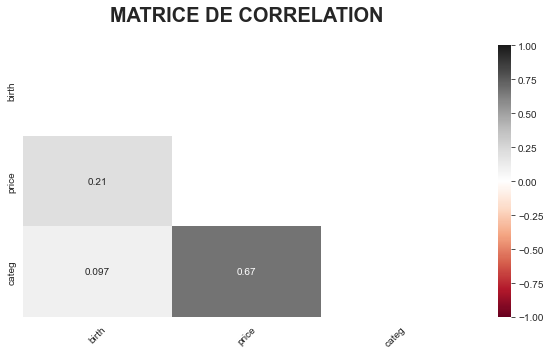

In [109]:
# Recherche d'une corrélation entre variables par une matrice de corrélation
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df_merged.corr(), mask=np.triu(np.ones_like(df_merged.corr(), dtype=np.bool_)), vmin=-1, vmax=1, annot=True, cmap='RdGy')
heatmap.set_title('MATRICE DE CORRELATION',weight='bold', fontdict={'fontsize':20}, pad=24)
plt.xticks(rotation=45)
plt.show()

In [48]:
# Remplacement des identifiants
df_merged['categ'].replace(np.nan, 0, inplace=True)

# Remplacement du prix
df_merged['price'].replace(np.nan, 10.32, inplace=True)

### Observations :
Les indices de corrélation confirment que la variable des catégories est la plus à même d'expliquer la variable des prix. Dans une moindre mesure, la variable de l'âge semble également avoir un impact sur celle des prix.
Nous décidons de remplacer le contenu de la variable categ pour ce produit par 0 et le prix par le prix médian définit plus tôt en amont.

Après cela, nous procédons à l'enregistrement du fichier au format csv.

In [49]:
# Enregistrement du nouveau fichier 
df_merged.to_csv('Data.csv', index=False)

Nous sommes à présent prêt pour débuter l'analyse et répondre aux questions demandées.